In [1]:
import pickle
import numpy as np

In [2]:


with open('./vit_base.pkl', 'rb') as f:
    vit_representations = pickle.load(f)

with open('./vgg16.pkl', 'rb') as f:
    vgg_representations = pickle.load(f)
    

In [3]:
vgg_layerwise_avg = np.mean(vgg_representations, axis=0)
vit_layerwise_avg = np.mean(vit_representations, axis=0)
vgg_layerwise_sem = np.std(vgg_representations, axis=0) / np.sqrt(vgg_representations.shape[0])
vit_layerwise_sem = np.std(vit_representations, axis=0) / np.sqrt(vit_representations.shape[0])

In [4]:
reference_mc=(16.075-14.33)/(16.075+14.33);
reference_name='Rollenhagen & Olson, 2000';

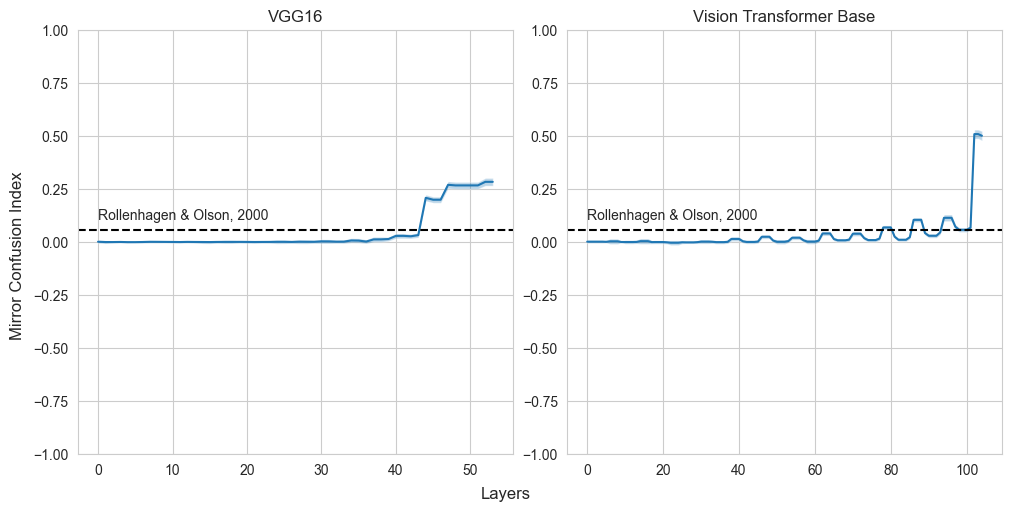

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# plot layerwise average

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))

ax1_layer_inds = np.arange(len(vgg_layerwise_avg))
sns.lineplot(x=ax1_layer_inds, y=vgg_layerwise_avg, ax=ax1)
ax1.axhline(y=reference_mc, color='black', linestyle='--')
ax1.text(0, reference_mc+0.1, reference_name, verticalalignment='top', horizontalalignment='left')
ax1.set_ylim(-1,1)
ax1.set_title('VGG16')
ax1.fill_between(ax1_layer_inds, vgg_layerwise_avg - vgg_layerwise_sem, vgg_layerwise_avg + vgg_layerwise_sem, alpha=0.3)

ax2_layer_inds = np.arange(len(vit_layerwise_avg))
sns.lineplot(data=vit_layerwise_avg, ax=ax2)
ax2.axhline(y=reference_mc, color='black', linestyle='--')
ax2.text(0, reference_mc+0.1, reference_name, verticalalignment='top', horizontalalignment='left')
ax2.set_ylim(-1,1)
ax2.set_title('Vision Transformer Base')
ax2.fill_between(ax2_layer_inds, vit_layerwise_avg - vit_layerwise_sem, vit_layerwise_avg + vit_layerwise_sem, alpha=0.3)
fig.supxlabel('Layers')
fig.supylabel("Mirror Confusion Index")

plt.show()